# E-tivity 3: Clustering and Manifold Learning

**Student:** Egberto Linhares Leal

## A. Importing required modules and dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn import manifold #needed for multidimensional scaling (MDS) and t-SNE
from sklearn import cluster #needed for k-Means clustering
from sklearn import preprocessing #needed for scaling attributes to the nterval [0,1]
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.cluster import AffinityPropagation
from sklearn import metrics
from sklearn.datasets import make_blobs

#### Load the dataset

In [2]:
df = pd.read_csv("./loans_train_prepared.csv")
data = np.array(df.values, dtype=float)
print('(number of examples, number of attributes): ', data.shape)

(number of examples, number of attributes):  (614, 16)


In [3]:
# Print first 5 rows of the dataframe
df.head(5)

,Dependents,ApplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Male,Gender_nan,Married_Yes,Married_nan,Self_Employed_Yes,Self_Employed_nan,Education_Not Graduate,Property_Area_Semiurban,Property_Area_Urban,Loan_Status_Y,TotalIncome
0,0.000000,1.084523,1.058140,0.75,1,1,0,0,0,0,0,0,0,1,1,0.841086
1,0.333333,0.925883,1.047319,0.75,1,1,0,1,0,0,0,0,0,0,0,0.871711
2,0.000000,0.683858,0.635920,0.75,1,1,0,1,0,1,0,0,0,1,1,0.385189
3,0.000000,0.608992,1.002824,0.75,1,1,0,1,0,0,0,1,0,1,1,0.717012
4,0.000000,1.101869,1.115650,0.75,1,1,0,0,0,0,0,0,0,1,1,0.860305


In [4]:
# Print last 5 rows of the dataframe
df.tail(5)

,Dependents,ApplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Male,Gender_nan,Married_Yes,Married_nan,Self_Employed_Yes,Self_Employed_nan,Education_Not Graduate,Property_Area_Semiurban,Property_Area_Urban,Loan_Status_Y,TotalIncome
609,0.000000,0.666409,0.676143,0.750,1,0,0,0,0,0,0,0,0,0,1,0.364708
610,1.000000,0.858916,0.395858,0.375,1,1,0,1,0,0,0,0,0,0,1,0.587496
611,0.333333,1.313719,1.566110,0.750,1,1,0,1,0,0,0,0,0,1,1,1.116075
612,0.666667,1.267616,1.325676,0.750,1,1,0,1,0,0,0,0,0,1,1,1.042256
613,0.000000,0.925883,1.074155,0.750,0,0,0,0,0,1,0,0,1,0,0,0.663523


# Task 3
Plot the sum of squared distances from the data points to the centers of the k-Means clusters for various values of k. Use the Elbow method to pick the best value of k. If it suggests a different value of k (from the one you used in Task 2), then compute a new k-Means clustering.

## B. Determine the optimal K

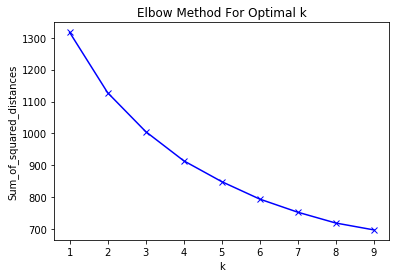

In [5]:
Sum_of_squared_distances = []
Num_K = range(1,10)
for k in Num_K:
    km = KMeans(n_clusters=k, max_iter=300)
    km = km.fit(df.values)
    Sum_of_squared_distances.append(km.inertia_)

plt.plot(Num_K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

**Elbow:** It is not very clear the ebow, but I would use from 2 to 6

**Conclusion:** I selected 4 as the number of clusters (K)

# Task 2

Follow the examples in the notebook Lab 3 - Clustering and Manifold Learning.ipynb to cluster the loans_train_prepared dataset (i.e. the result of the example notebook for e-tivity 2). Use the k-Means clustering algorithm and visualise the clustering. Pick a value of k suggested by the MDS and t-SNE visualisations of the dataset. Experiment with various values of the parameters of k-Means. Aim at producing a meaningful clustering that allows you to describe the clusters with words. Write a short conclusion about the characteristics of the clusters.

### C. Scatterplot Function (to be used below for visualising a clustering)

In [6]:
colors = np.array(['orange', 'blue', 'lime', 'khaki', 'pink', 'green', 'purple', 'blue'])

# points - a 2D array of (x,y) coordinates of data points
# labels - an array of numeric labels in the interval [0..k-1], one for each point
# centers - a 2D array of (x, y) coordinates of cluster centers
# title - title of the plot


def clustering_scatterplot(points, labels, centers, title):
    
    
    n_clusters = np.unique(labels).size
    for i in range(n_clusters):
        h = plt.scatter(points[labels==i,0],
                        points[labels==i,1], 
                        c=colors[i%colors.size],
                        label = 'cluster '+str(i))

    # plot the centers of the clusters
    if centers is not None:
        plt.scatter(centers[:,0], centers[:,1], c='r', marker='*', s=500)

    _ = plt.title(title)
    _ = plt.legend()
    _ = plt.xlabel('x')
    _ = plt.ylabel('y')

### D. K-Means Clustering

Number of clusters $k$.

In [7]:
# Number of clusters for the solution
k = 4

#### Run k-Means

In [8]:
clustered_data_sklearn = cluster.KMeans(n_clusters=k, n_init=10, max_iter=300).fit(data)

### E. Apply a manifold-learning technique to project the data set to a 2D space

Append the cluster centers to the dataset.

In [9]:
data_and_centers = np.r_[data,clustered_data_sklearn.cluster_centers_]

#### E1. Apply multi-dimensional scaling (MDS) to project both the data and the k-Means cluster centers to a 2D space

Project both the data and the k-Means cluster centers to 2D.

In [10]:
XYcoordinates = manifold.MDS(n_components=2).fit_transform(data_and_centers)
print("transformation complete")

transformation complete


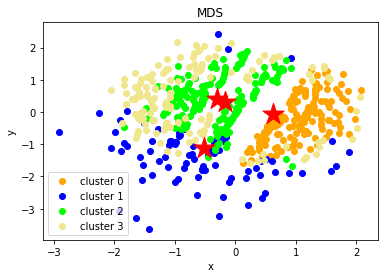

In [11]:
# Plot the transformed examples and the centers. Use the cluster assignment to colour the examples.

clustering_scatterplot(points=XYcoordinates[:-k,:], 
                       labels=clustered_data_sklearn.labels_, 
                       centers=XYcoordinates[-k:,:], 
                       title='MDS')

#### E2. Apply t-SNE to project both the data and the k-Means cluster centers to a 2D space

In [12]:
# Project both the data and the k-Means cluster centers to 2D.
XYcoordinates = manifold.TSNE(n_components=2).fit_transform(data_and_centers)
print("transformation complete")

transformation complete


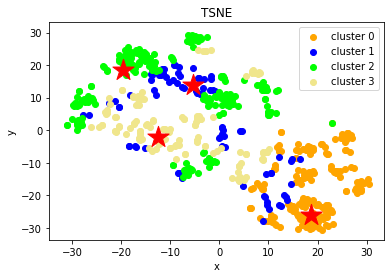

In [13]:
# Plot the transformed examples and the centers. Use the cluster assignment to colour the examples.

clustering_scatterplot(points=XYcoordinates[:-k,:], 
                       labels=clustered_data_sklearn.labels_,
                       centers=XYcoordinates[-k:,:], 
                       title='TSNE')

### F. Cluster Analysis

#### Add the cluster labels as an extra column in the original dataframe

In [14]:
df['cluster'] = pd.Series(clustered_data_sklearn.labels_, index=df.index)

In [15]:
df.groupby('cluster').mean()

,Dependents,ApplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Male,Gender_nan,Married_Yes,Married_nan,Self_Employed_Yes,Self_Employed_nan,Education_Not Graduate,Property_Area_Semiurban,Property_Area_Urban,Loan_Status_Y,TotalIncome
cluster,,,,,,,,,,,,,,,,
0,0.235816,0.829554,1.038559,0.719149,0.984043,0.760638,0.010638,0.659574,0.010638,0.122340,0.042553,0.212766,1.000000,0.000000,0.877660,0.777251
1,0.321429,1.649797,1.522080,0.708333,0.892857,0.785714,0.059524,0.654762,0.000000,0.333333,0.035714,0.023810,0.250000,0.404762,0.630952,1.639704
2,0.235294,0.786369,0.986018,0.702206,0.985294,0.852941,0.004902,0.647059,0.004902,0.098039,0.068627,0.225490,0.000000,0.544118,1.000000,0.737315
3,0.239130,0.781355,0.989485,0.725000,0.463768,0.768116,0.036232,0.630435,0.000000,0.079710,0.050725,0.333333,0.173913,0.413043,0.000000,0.691439


#### G. Conclusion

By looking at the table above we can argue that:
* **Cluster 0:** This cluster has a great trend to have a credit history and also be a man. Another feature is that he/she always lives in an urban area.
* **Cluster 1:** It has a high number of dependents and a high Total Income.
* **Cluster 2:** Everyone in this cluster has a loan and no one lives in a semi-urban area.
* **Cluster 3:** No one has loan and the total income is low.

_Note that this conclusion is true for this run of k-Means. If the code is executed again, k-Means may produce either different clusters or the same clusters but in a different order._

# Task 4
Apply another clustering algorithm (from the ones available in scikit-learn) to the same dataset and an appropriate manifold-learning technique to visualise the clustering.

In [16]:
df_task4 = pd.read_csv("./loans_train_prepared.csv")
data_task4 = np.array(df_task4.values, dtype=float)
print('(number of examples, number of attributes): ', data_task4.shape)

(number of examples, number of attributes):  (614, 16)


**Algorithm**

I selected the **Affinity Propagation** algorithm 

Estimated number of clusters: 8
Silhouette Coefficient: 0.245


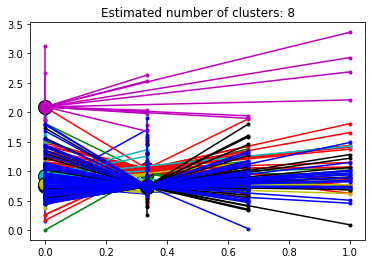

In [17]:
# Get data
X = data_task4

# Compute Affinity Propagation
af = AffinityPropagation(preference=-50).fit(X)
cluster_centers_indices = af.cluster_centers_indices_
labels = af.labels_

n_clusters_ = len(cluster_centers_indices)

print('Estimated number of clusters: %d' % n_clusters_)
print("Silhouette Coefficient: %0.3f"
      % metrics.silhouette_score(X, labels, metric='sqeuclidean'))

# #############################################################################
# Plot result
import matplotlib.pyplot as plt
from itertools import cycle

plt.close('all')
plt.figure(1)
plt.clf()

colors = cycle('bgrcmykbgrcmykbgrcmykbgrcmyk')
for k, col in zip(range(n_clusters_), colors):
    class_members = labels == k
    cluster_center = X[cluster_centers_indices[k]]
    plt.plot(X[class_members, 0], X[class_members, 1], col + '.')
    plt.plot(cluster_center[0], cluster_center[1], 'o', markerfacecolor=col,
             markeredgecolor='k', markersize=14)
    for x in X[class_members]:
        plt.plot([cluster_center[0], x[0]], [cluster_center[1], x[1]], col)

plt.title('Estimated number of clusters: %d' % n_clusters_)
plt.show()


**Number of clusters:** 8
It isn't easy to analyse the results looking the clusters